In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

### Read Data 

In [11]:
df = np.array(pd.read_csv("data/student_loan_train.csv"))
x_train =df[:,0]
y_train = df[:,1]

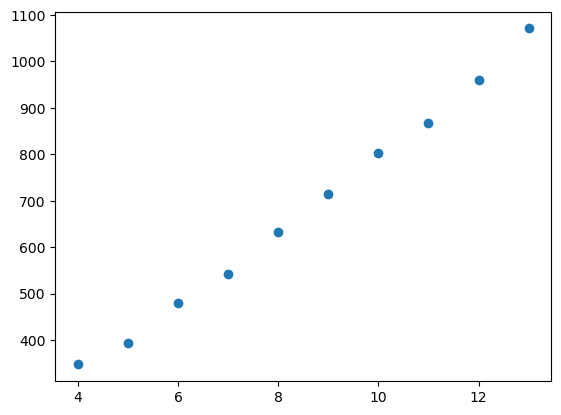

In [12]:
plt.scatter(x_train , y_train);

## Functions 

In [13]:
def regression(w0 , w1 , x): 
    y_hat = w0 + w1*x
    return y_hat

def mse(y , y_hat): #Mean Squared Error
    loss = np.mean((y - y_hat)**2)
    return loss

def mae(y , y_hat): #Mean Absolute Error
    loss = np.mean(np.abs((y - y_hat)))
    return loss

def r2(y , y_hat):  #R-Squared
    return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)


### Train

In [14]:
n_epoch = 100
w0, w1 = np.random.randn(), np.random.randn()
eta = 0.001
errors = []
for i in range(n_epoch):
    y_hat = regression(w0 , w1 , x_train)

    errors.append(mse(y_train , y_hat))
    
    grad_w0=2*np.mean(y_hat - y_train)
    grad_w1=2*np.mean(x_train*(y_hat - y_train))
    w1-=eta*grad_w1
    w0-=eta*grad_w0

0.9953314183674222

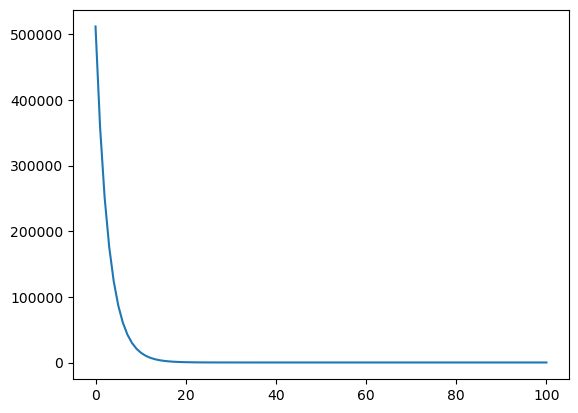

In [15]:
#Error Hist 
plt.plot(np.linspace(0 , n_epoch , n_epoch) , errors);
r2(y_train , y_hat)

In [16]:
#save ws
np.savetxt("W's Of Linear Regression" , np.array([w0 , w1]))

### Test

In [17]:
#Load test data sets 
df_test = np.array(pd.read_csv("data/student_loan_test.csv"))
x_test = df_test[:,0]
y_test =df_test[:,1]

In [18]:
#load ws
ws = np.loadtxt("W's Of Linear Regression")
w0 = ws[0]
w1 = ws[1]

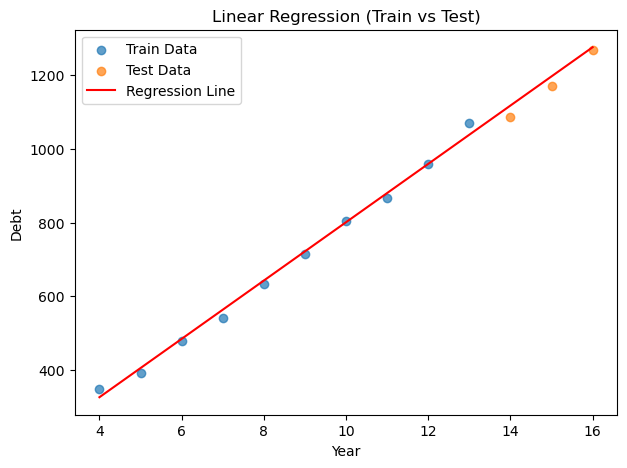

In [19]:
min_x = min(x_train.min(), x_test.min())
max_x = max(x_train.max(), x_test.max())

x = np.linspace(min_x , max_x , x_train.shape[0])
x_line = np.linspace(min_x, max_x, 100)
y_line = regression(w0, w1, x_line)

plt.figure(figsize=(7,5))
plt.scatter(x_train, y_train, label="Train Data", alpha=0.7)
plt.scatter(x_test, y_test, label="Test Data", alpha=0.7)
plt.plot(x_line, y_line, 'r', label="Regression Line")
plt.legend()
plt.title("Linear Regression (Train vs Test)")
plt.xlabel("Year")
plt.ylabel("Debt")
plt.show()

In [20]:
y_hat_test = regression(w0 , w1 , x_test)
print(f"R2: {float(r2(y_test , y_hat_test)):.4}")
print(f"MAE: {float(mae(y_test , y_hat_test)):.4}")

R2: 0.8972
MAE: 21.65
